In [124]:
import numpy as np
import matplotlib.pyplot as plt
import magnetic_boundaries as mb
from math import pi

from matplotlib import rc
rc('text', usetex=True)

In [125]:
parameters = dict(
    Ly = 51,
    Lx = 51,
    theta_top = 0,
    theta_bot = 0,
    mag_field = 0.1,
    noise = 0.1,
    mass = 0,
)


path = 'data/'
name = 'disorder_tangent'

number_of_jobs = 100
nbands = (parameters['Lx']*parameters['Ly'])//2
spectrum = np.zeros((number_of_jobs,nbands))

for job in range(number_of_jobs):
    spectrum[job] = np.load(path+name+'_Lx'+str(parameters['Lx'])+'_Ly'+str(parameters['Ly'])+'_magfield'+str(parameters['mag_field'])+'_noise'+str(parameters['noise'])+str(job)+'.npy', allow_pickle=True)

865


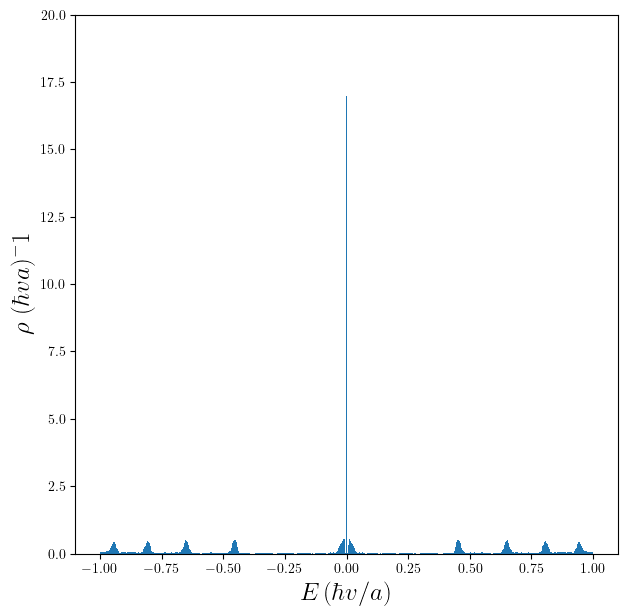

In [126]:
nbins = (parameters['Lx']*parameters['Ly']//15+1-(parameters['Lx']*parameters['Ly']//15)%2)*5
print(nbins)
#The previous line ensures that the amount of bins is proportional to the system size and always odd.
density_of_states, bin_edges = np.histogram(spectrum.flatten(), bins = nbins, range = (-1,1), density = False)

x = (bin_edges[1:]+bin_edges[:-1])/2
dx = (bin_edges[1]-bin_edges[0])

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
area = parameters['Lx']*parameters['Ly']
ax.bar(x,density_of_states/dx/area/number_of_jobs,width = dx)
ax.set_ylabel(r"$\rho$ $(\hbar va)^-1$",fontsize = 18)
ax.set_xlabel(r"$E\,(\hbar v/a)$",fontsize = 18)
ax.set_ylim(0,20)

plt.savefig("density_of_states_tangent.pdf", dpi=300, bbox_inches='tight')

In [127]:
parameters = {
    'width' : int(151), # This is in units of 3a
    'length' : int(51),# This is in units of sqrt(3)a
    'bottom_bearded' : True,
    'top_bearded' : False,
    'mag_field' : 0.1,
    'noise' : 0.1,
             }


path = 'data/'
name = 'disorder_graphene'

number_of_jobs = 100
spectrum = np.zeros((number_of_jobs,(4*parameters['width']-2+parameters['bottom_bearded']+parameters['top_bearded'])*parameters['length']))

for job in range(number_of_jobs):
    spectrum[job] = np.load(path+name+'_length'+str(parameters['length'])+'_width'+str(parameters['width'])+'_magfield'+str(parameters['mag_field'])+'_noise'+str(parameters['noise'])+str(job)+'.npy', allow_pickle=True)

865


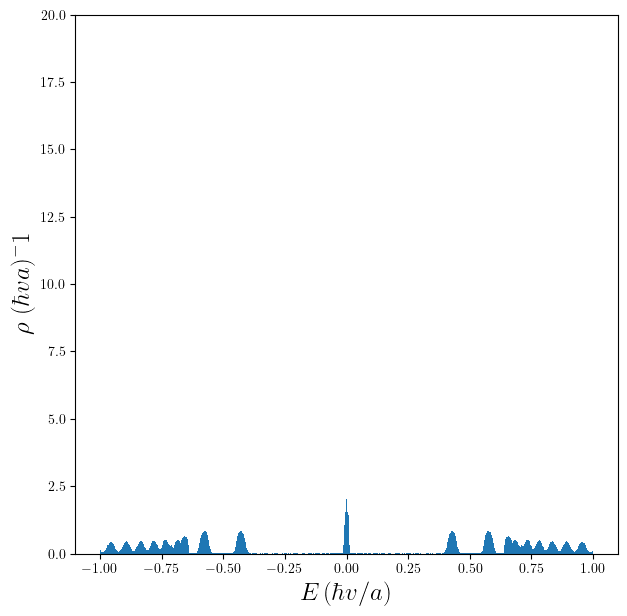

In [128]:
#nbins = (parameters['width']*parameters['length']//2+1-(parameters['width']*parameters['length']//2)%2)*1
nbins = 865
print(nbins)
#The previous line ensures that the amount of bins is proportional to the system size and always odd.
density_of_states, bin_edges = np.histogram(spectrum.flatten(), bins = nbins, range = (-1,1), density = False)

x = (bin_edges[1:]+bin_edges[:-1])/2
dx = (bin_edges[1]-bin_edges[0])

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
area = parameters['width']*parameters['length']*3*np.sqrt(3)
ax.bar(x,density_of_states/dx/area/number_of_jobs,width = dx)
ax.set_ylabel(r"$\rho$ $(\hbar va)^-1$",fontsize = 18)
ax.set_xlabel(r"$E\,(\hbar v/a)$",fontsize = 18)

ax.set_ylim(0,20)
plt.savefig("density_of_states_graphene.pdf", dpi=300, bbox_inches='tight')